1. Сравните метрики hit_rate@k, precision@k.   
Какую метрику использовать предпочтительно и почему?  
Приведите пример 2-3 задач (опишите, что является клиентом, что товаром), в которой более уместно использовать метрику hit_rate?


Если _Hit rate@k_ показывает был ли ралевантен хотя бы один товар, а _Precision@k_ показывает долю ролевантных товаров, то _Precision@k_ кажется более наглядным.   
Обычно мы хотим максимизировать прибыль, для этого модель должна выдавать как можно большее количество ралевантных товаров. _Precision@k_ для таких случаев подходит иделаьно.   

_hit_rate@k_ подходит для таких случаев как например:   
1) Магазин специализируется только на одном виде товаров. Пусть будет автосалон. Вряд ли человек(клиент), захочет себе несколько машин(товар). Но при этом автосалон должен выдать такую рекомендацию, что бы клиент хоть что-то из этого но купил.   
2) Запросы в поисковике. Например мы ищем ответ на ворос "Что такое перцептрон". На первой странице мы получим 20 ссылок. Но случайные 1-2 ссылки будут достаточны для ответа на вопрос. Здесь: пользователь - клиент, сслыка - товар.   
3) Агрегатор товаров. Агрегатор выдаёт рекомендации по производителям. Могут быть такие производители, у которых мало что покупают. Нас здесь как раз интересует факт покупки. Тогда агрегатор может отказаться сотрудничать с таким производителем. Здесь: пользователь - клиент, товар производителя - товар.







2. В метрике NDCG@k мы используем логарифм в знаменателе. Как Вы думаете, почему именно логарифм? Какую функцию можно использовать вместо логарифма? Привидите пример метрик/подходов к предобработке данных/функций ошибок в ML, где также в  логарифм.



_"Использование логарифма как функции дисконтирования можно объяснить следующими интуитивными соображениями: с точки зрения ранжирования позиции в начале списка отличаются гораздо сильнее, чем позиции в его конце. Так, в случае поискового движка между позициями 1 и 11 целая пропасть (лишь в нескольких случаях из ста пользователь заходит дальшей первой страницы поисковой выдачи), а между позициями 101 и 111 особой разницы нет — до них мало кто доходит."_ [Ваша ссылка на хабр))](https://habr.com/ru/company/econtenta/blog/303458/)   

Своими словами: чем дальше элемент по списку тем меньшее значение имеет знаменатель. Ну а сам логарифм уменьшает влияние знаменателя.   

Вместо логорифма можно использовать например: корень второй или третьей степени.   

Пример метрик и подходов с логарифмом: логарифмеческая функция потерь, неявно логарифм присутвует в дереве решений, активационная функция SoftPlus.


3. Какие еще метрики (Вы можете вспомнить уже пройденные Вами или посмотреть в интернете) могут использоваться для рекомендательных систем (приведите примеры метрики **и чем являются интеракции**, чтобы она могла быть использована).

_Метрики на основе каскадной модели поведения пользователя_ - последовательное изучение предложенных пользователю элементов. Вероятность просмотра элемента зависит от релевантности предыдущих.    
Например:
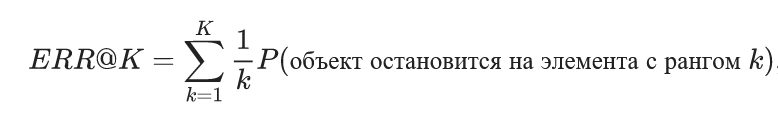

Можно попробовать применить F-score.  
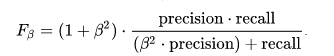   
По понятным причинам интеракции здесь теже что в _Recall_ и _Precision_. Пользователь как-то провзаимодействовал с товаром: купил товар, поставил оценку фильму и тд. 

4. boughted = [1, 3, 5, 7, 9, 11]  
recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]  
Посчитайте на этих данных pr@8, rec@8, AP@8, NDCG@8, MRR@8,  
Сначала поссчитайет "руками", а затем подтвердите рассчеты с помощью функций (некоторые были на семинаре, некоторые нужно будут написать самостоятельно)

IDCG должен считаться для всех 8 позиций рекомендаций

__Precision@8__   

boughted = [1, 3, 5, 7, 9, 11]   
recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]       

$precison@8 = \frac{0 + 0 + 1 + 1 + 1 + 1}{1+1+1+1+1+1+1+1} = 0.5$  

In [1]:
import numpy as np
def precision_at_k(recommended_list, bought_list, k=8):
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)[:k]
    flags = np.isin(bought_list, recommended_list)
    return flags.sum() / len(recommended_list)
pr = precision_at_k([2, 5, 7, 4, 11, 9, 8, 10, 12, 3] , [1, 3, 5, 7, 9, 11],8)
print(pr)

0.5


__Recall@8__   

boughted = [1, 3, 5, 7, 9, 11]   
recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]      

$recall@8 = \frac{0 + 0 + 1 + 1 + 1 + 1}{1+1+1+1+1+1} = 0.66$  

In [2]:
def recall_at_k(recommended_list, bought_list, k=8):
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)[:k]
    flags = np.isin(bought_list, recommended_list)
    return flags.sum() / len(bought_list)
r = recall_at_k([2, 5, 7, 4, 11, 9, 8, 10, 12, 3] , [1, 3, 5, 7, 9, 11],8)
print(r)

0.6666666666666666


__AP@8__   

boughted = [1, 3, 5, 7, 9, 11]   
recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]      

$precison@8 = 0.5\%$  
$ap@8 = \frac{0 + 0 + 0.5 + 0.5 + 0.5 + 0.5}{1+1+1+1+1+1} = 0.25$  

In [3]:
#функция исправлена в соотсвествии с формулой
def ap_k(recommended_list, bought_list, k=8):
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)[:k]
    flags = np.isin(recommended_list, bought_list)
    if sum(flags) == 0: return 0
    sum_ = 0
    for i in range(k): 
        if flags[i] == True:
            p_k = precision_at_k(recommended_list, bought_list, 8)
            sum_ += p_k
            
    result = sum_ / len(flags)
    
    return result
ap = ap_k([2, 5, 7, 4, 11, 9, 8, 10, 12, 3] , [1, 3, 5, 7, 9, 11],8)
print(ap)

0.25


__NDCG@8__   
boughted = [1, 3, 5, 7, 9, 11]   
recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]      

$DCG = \frac{1}{|r|} \sum_u{\frac{[bought fact]}{discount(i)}} = \frac{1}{8} (\frac{0}{1} + \frac{1}{1} + \frac{1}{log_2(3)} + \frac{0}{log_2(4)} + \frac{1}{log_2(5)} + \frac{1}{log_2(6)} + \frac{0}{log_2(7)} + \frac{0}{log_2(8)} ) = 0.125 * (1 + 0.63 + 0.43 + 0.39 + 2.81) = 2.45$  
$ideal DCG = \frac{1}{|r|} \sum_u{\frac{[bought fact]}{discount(i)}} = \frac{1}{8} (\frac{1}{1} + \frac{1}{1} + \frac{1}{log_2(3)} + \frac{1}{log_2(4)} + \frac{1}{log_2(5)} + \frac{1}{log_2(6)} + \frac{1}{log_2(7)} + \frac{1}{log_2(8)} ) = 0.125 * (2 + 0.63 + 0.5 + 0.43 + 0.39 + 0.36 + 0.33) = 4.64$  
$NDCG = \frac{2.45}{4.64} = 0,52$


In [4]:
#функция исправлена в соотсвествии с формулой
def ndcg_k(recommended_list, bought_list, k=8):
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)[:k]
    flags = np.isin(recommended_list, bought_list)
    if sum(flags) == 0: return 0
    dgc = idgc = 0
    lg2 = np.log2(np.linspace(1, k, num=k))
    lg2[0]=1
    for i in range(k): 
        if flags[i] == True:
            dgc += 1/lg2[i]
        idgc += 1/lg2[i]    
    return dgc / idgc

ndcg = ndcg_k([2, 5, 7, 4, 11, 9, 8, 10, 12, 3] , [1, 3, 5, 7, 9, 11],8)
print(ndcg)

0.5279127445637272


__MRR@8__   

boughted = [1, 3, 5, 7, 9, 11]   
recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]      
$MRR = mean(\frac{1}{k_u})$

$rank@8 = 1/2+1/3+1/5 + 1/6 = 1.2$  
$MRR@8 = \frac{1.2}{8} = 0.15$  

In [5]:
def reciprocal_rank_k(recommended_list, bought_list,k=8):
    recommended_list = recommended_list[:k]
    ranks=0.
    for i, item_rec in enumerate(recommended_list):
        for item_bought in bought_list:
            if item_rec == item_bought:
                ranks += 1 / (i+1)
    return ranks / len(recommended_list)
mrr = reciprocal_rank_k([2, 5, 7, 4, 11, 9, 8, 10, 12, 3], [1, 3, 5, 7, 9, 11],8)
print(mrr)

0.15
